<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

ASSIGNMENT - SESSION 7 - Overfitting

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

# Early Stopping and Reduce Learning Rate on Plateau

## Prepare data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/Susros/spiralsdataset.git

Cloning into 'spiralsdataset'...
remote: Enumerating objects: 9, done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (9/9), done.


In [ ]:
import numpy as np
np.random.seed(42)
from spiralsdataset import spiralsdataset

MAX_RADIUS = 3

def generate_data():
  points, classes = spiralsdataset.generate_three_spirals_dataset(density=40,maxRadius=MAX_RADIUS)
  X = np.array(points)
  y = np.array(classes)
  return X, y


X, y = generate_data()
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
  

Shape of X: (11520, 2)
Shape of y: (11520, 1)


In [ ]:
# TODO
# 1. Apply one-hot encoding to y, đặt tên biến mới là Y
from tensorflow.keras.utils import to_categorical

Y = to_categorical(y, num_classes=3)

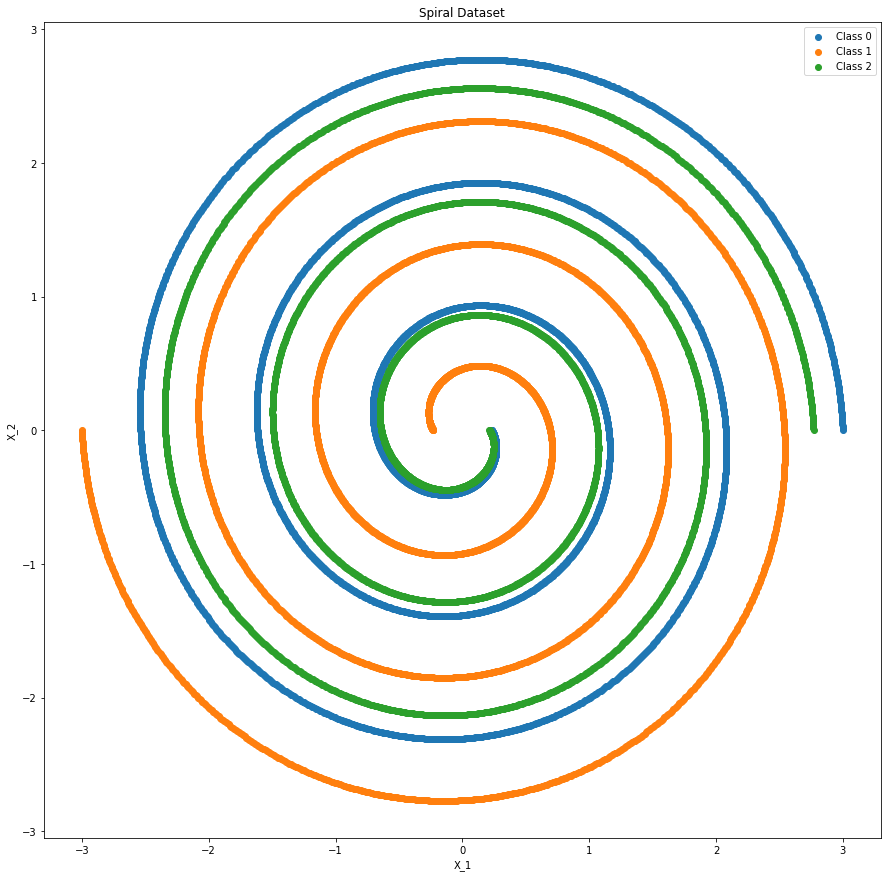

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.scatter(X[np.where(y==0)[0]][:,0], X[np.where(y==0)[0]][:,1])
plt.scatter(X[np.where(y==1)[0]][:,0], X[np.where(y==1)[0]][:,1])
plt.scatter(X[np.where(y==2)[0]][:,0], X[np.where(y==2)[0]][:,1])
plt.title('Spiral Dataset')
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [ ]:
# TODO
# 1. Split data into Train Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

In [ ]:
from tensorflow.random import set_seed

EPOCHS=200
set_seed(42)
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
# TODOs
# 1. Create and train DNN model
model = Sequential()
EPOCHS=200


set_seed(42)

spiral_model = Sequential()
spiral_model.add(Dense(128, activation='relu', input_shape=(X.shape[1:])))
spiral_model.add(Dense(128, activation='relu'))
spiral_model.add(Dense(128, activation='relu'))
spiral_model.add(Dense(3, activation='softmax'))
spiral_model.compile(loss='categorical_crossentropy', optimizer='ad am', metrics='accuracy')
history = spiral_model.fit(X_train, Y_train, epochs=EPOCHS, verbose=0, validation_split=0.2)
spiral_model.evaluate(X_train, Y_train)


288/288 [==============================] - 1s 2ms/step - loss: 2.9745e-04 - accuracy: 1.0000


[0.0002974524686578661, 1.0]

Text(0.5, 1.0, 'Accuracy versus Epochs')

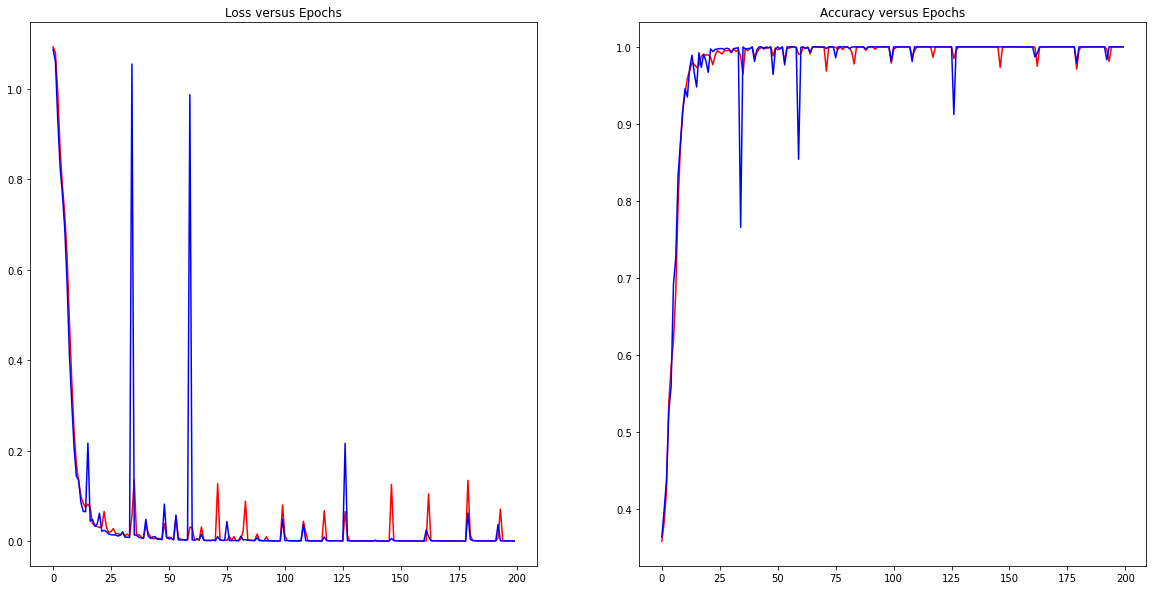

In [ ]:
# TODO
# 1. Plot learning curve
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], c='red')
plt.plot(history.history['val_loss'], c='blue')
plt.title('Loss versus Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], c='red')
plt.plot(history.history['val_accuracy'], c='blue')
plt.title('Accuracy versus Epochs')

# Dropout and Feature Selection


**DATASET** https://drive.google.com/file/d/1_hrnlNDf6NIVAv71Je28Wp47nBISSF9h/view?usp=sharing

## Prepare data

In [ ]:
import pandas as pd
import os

#TODO
# 1. Change DATA_PATH

DATA_PATH = '/content/drive/My Drive/COTAI_Training/7.Tuning/s7_data'

train_df =  pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))

In [ ]:
# TODOs
# print out first 5 rows

**Convert from Dataframe to numpy array**

In [ ]:
# TODO
# 1. Get X, y from train_df


**Split data into Train and Test**

In [ ]:
# TODO
# Split X, y into Train Set and Test Set with stratify=y



## Create model

**Write a function for drawing chart**

In [ ]:
# TODO
# 1. complete draw_chart function

def draw_chart(history):
  pass

**Overfit Model**

In [ ]:
# TODO
# 1. create a DNN with 3 hidden-layers and 50 units in each layer
# 2. compile the model
set_seed(42)
over_model = Sequential()


In [ ]:
# TODO 
# 1. Train model and plot learning curve


**Adding Dropout**

In [ ]:
# TODO
# 1. create and train a DNN with 3 hidden-layers and 50 units in each layer
# 2. Add dropout layer before Dense, dropout size = 0.4 
# 3. compile the model

set_seed(42)
tuned_model = Sequential()
# your code here

**Feature Selection using sklearn**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=10)
X_train = selector.fit_transform(X_train,  y_train)
X_val = selector.transform(X_val)

**EarlyStopping and Reduce Learning Rate Callback**

In [ ]:
# TODOs
# 1. Create EarlyStopping and ReduceLRonPlataue callback
# 2. Train model
# 3. Plot learning Curve

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
y_pred = tuned_model.predict(X_val)
y_pred = np.where(y_pred >= 0.5, 1, 0)
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, 
            cmap='Blues')

# Image Data Augmentation

**DATASET** https://drive.google.com/file/d/1JIRuWcG4e_5XXbjRMQWvr-Bi2pPp2ghh/view?usp=sharing

In [ ]:
!unzip -qq '/content/drive/My Drive/COTAI_Training/mask.zip' -d '/content/mask_data'

In [ ]:
import os
print(os.listdir('/content/mask_data'))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/mask_data"
TEST_DIR = '/content/mask_data'
train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                  validation_split=0.2, 
                                    
                                  # horizontal_flip=True,
                                  # rotation_range=20,
                                  # width_shift_range=0.15,
                                  # height_shift_range=0.25,
                                  # shear_range=0.2,
                                  # zoom_range=0.2,
                                  )

test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    shuffle=True,
                                                    seed=42,
                                                    class_mode='binary',
                                                    subset = 'training',
                                                    target_size=(150, 150),
                                                    color_mode='grayscale')

validation_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                         shuffle=True,
                                                         seed=42,
                                                         class_mode='binary',
                                                         subset = 'validation',
                                                         target_size=(150, 150),
                                                         color_mode='grayscale')


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [ ]:
im = validation_generator.next()
for img, label in zip(im[0], im[1]):  
  plt.imshow(np.squeeze(img), cmap='gray')
  plt.title(label)
  plt.show()

In [ ]:
set_seed(42)
model = Sequential()
# TODOs
# 1. Create and compile a DNN model


model.fit(train_generator, epochs=10, validation_data=validation_generator)
